In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/Baran/anaconda/envs/py3k/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/Baran/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
train = pd.read_csv("train.csv")
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b8d588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1168efe48>]], dtype=object)

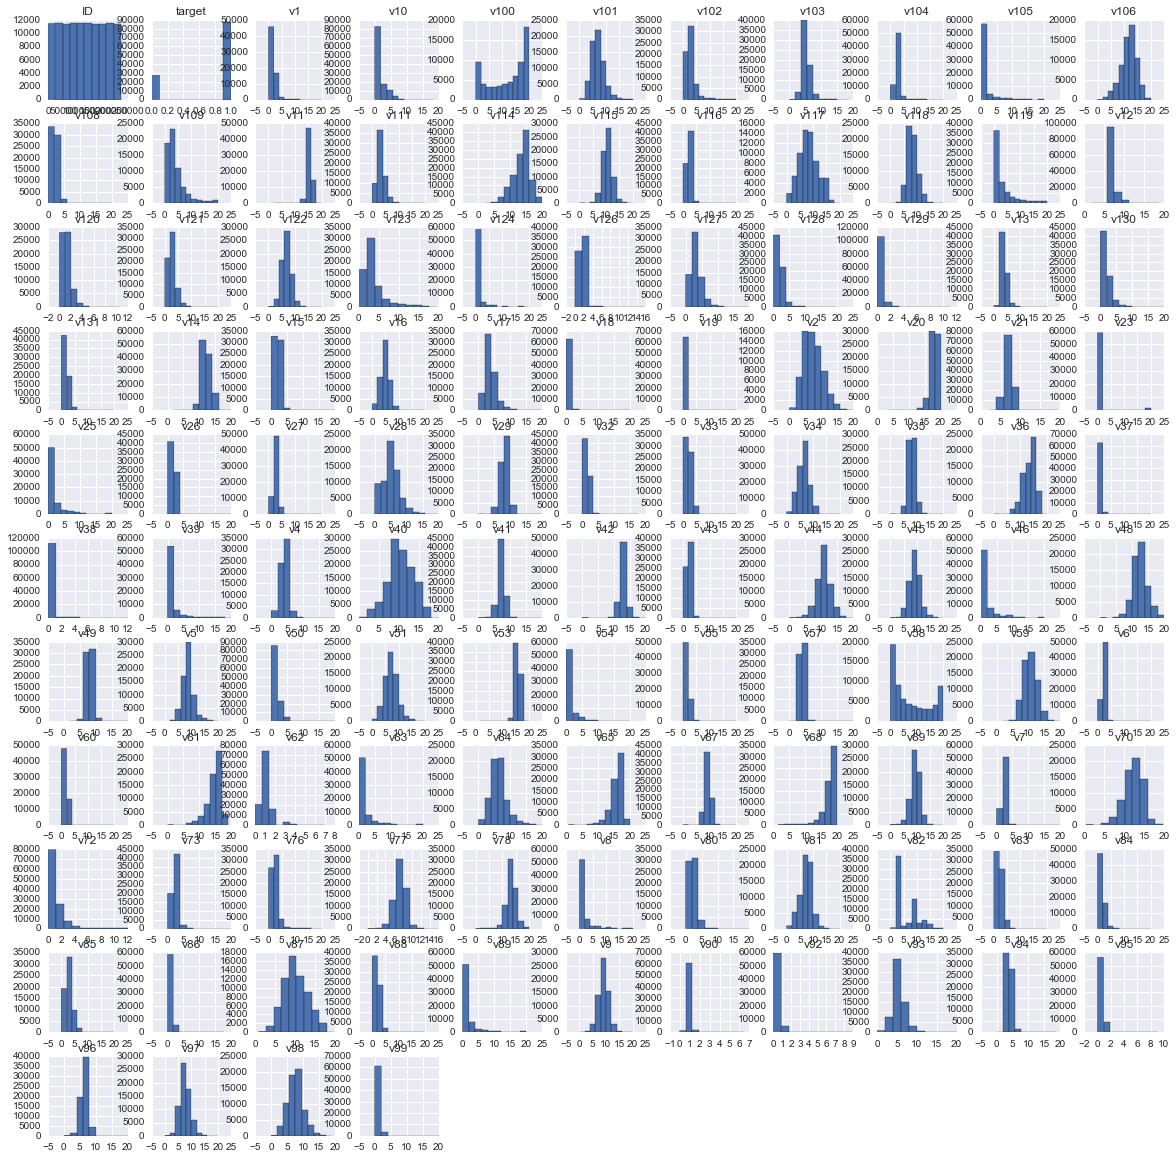

In [3]:
train.hist(figsize=(20,20))

In [4]:
# Check if data unbalanced
target_1 = len(train[train["target"] == 1])
target_0 = len(train[train["target"] == 0])
print("Percentage of class 1 is: {}".format(str(target_1)))
print("percentage of class 0 is: {}".format(str(target_0)))

Percentage of class 1 is: 87021
percentage of class 0 is: 27300


In [5]:
# Selecting and unpacking categorical variables
categoricals = []
for i in train.columns:
    if train[i].dtype == "object":
        categoricals.append(i)
categoricals

# Remove v22 to make it computationally efficient
categoricals.remove("v22")

for item in categoricals:
    for i in train[item].unique():
        new_col = item + "." + str(i)
        train[new_col] = train[item].apply(lambda x: 1 if x == i else 0)
    del train[item]

train.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v125.AX,v125.AW,v125.BF,v125.AJ,v125.AB,v125.BB,v125.AA,v125.BA,v125.nan,v125.BZ
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0,0,0,0,0,0,0,0,0,0
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,0,0,0,0,0,0,0,0,0,0
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Resample the data to balance the data
train_1 = train[train["target"] == 1]
train_0 = train[train["target"] == 0]

train_1_sample = train_1.sample(len(train_0), random_state= 3)
print(len(train_0), len(train_1_sample))

27300 27300


In [7]:
# Merge
train = train_1_sample.append(train_0)